In [1]:
import os
files = [os.path.join('sessions/scal/simulations/', folder,'log/scal_system.log') for folder in os.listdir('sessions/scal/simulations/')]
assert all(os.path.isfile(file) for file in files)

import re
import pandas as pd
data = {
    'target recall': [],
    'proportion relevance': [],
    'ranking function': [],
    'effort':[],
    'b':[],
    'seed': [],
    'relevant found': [],
    'prevalence': [],
    'precision': [],
    'recall': [],
    'f1-score': [],
    'threshold': [],
    'accuracy': [],
    'j': [],
    'TP': [],
    'TN': [],
    'FP': [],
    'FN': [],
    'N': [],
    'unlabeled size': [],
    'representation': [],
}
for file in files:
    content = open(file, 'r').read()
    if 'SIMULATION RESULTS' in content  :
        data['target recall'].append(float(re.search('target_recall=\ *([0-9\.]*)',content).groups()[0]))
        data['proportion relevance'].append(float(re.search('proportion_relevance_feedback=\ *([0-9\.]*)',content).groups()[0]))
        data['ranking function'].append((re.search('ranking_function=\ *([^\ \n]*)',content).groups()[0]))
        data['effort'].append(int(re.search('Effort[^=]*=\ *([^\ \n]*)',content).groups()[0]))
        data['b'].append(int(re.search('batch_size_cap=\ *([0-9]*)',content).groups()[0]))
        data['seed'].append(int(re.search('seed\ [^=]*=\ *([0-9]*)',content).groups()[0]))
        data['N'].append(int(re.search('random_sample_size=\ *([0-9]*)',content).groups()[0]))
        data['unlabeled size'].append(int(re.search('len\(unlabeled_collection\)=\ *([0-9]*)',content).groups()[0]))
        data['accuracy'].append(float(re.search('accuracy=([\.0-9]*)',content).groups()[0]))
        data['precision'].append(float(re.search('SIMULATION RESULTS.*precision=([\.0-9]*)',content).groups()[0]))
        data['recall'].append(float(re.search('SIMULATION RESULTS.*recall=([\.0-9]*)',content).groups()[0]))
        data['f1-score'].append(float(re.search('SIMULATION RESULTS.*F1-score=([\.0-9]*)',content).groups()[0]))
        data['prevalence'].append(float(re.search('Est. prevalecence\ *=([\.0-9]*)',content).groups()[0]))
        data['TN'].append(int(re.search('SIMULATION RESULTS.*TN=([0-9]*)',content).groups()[0]))
        data['FN'].append(int(re.search('SIMULATION RESULTS.*FN=([0-9]*)',content).groups()[0]))
        data['TP'].append(int(re.search('SIMULATION RESULTS.*TP=([0-9]*)',content).groups()[0]))
        data['FP'].append(int(re.search('SIMULATION RESULTS.*FP=([0-9]*)',content).groups()[0]))
        data['relevant found'].append((re.search('Relevant found \(total\) =(.*)',content).groups()[0]))
        data['threshold'].append(float(re.search('Threshold\ *=([\.0-9]*)',content).groups()[0]))
        data['j'].append(int(re.search('j\ *=([0-9]*)',content).groups()[0]))
        if 'glove2' in file:
            data['representation'].append('GloVe2')
        elif 'glove3' in file:
            data['representation'].append('GloVe3')
        elif 'glove' in file:
            data['representation'].append('GloVe')
        elif 'sbert' in file:
            data['representation'].append('sbert')
        else:
            data['representation'].append('BoW')
df = pd.DataFrame(data)
metrics = ['TN', 'TP', 'FN', 'FP', 'accuracy', 'precision', 'recall', 'f1-score', 'prevalence' ]

groupby=['target recall', 'proportion relevance', 'ranking function', 'representation']

df['experiment_name'] = ['_'.join([str(df[elem].iloc[idx]) for elem in groupby]) for idx in range(len(df))]
df[groupby+['experiment_name']]

,target recall,proportion relevance,ranking function,representation,experiment_name
0,0.8,1.0,uncertainty,sbert,0.8_1.0_uncertainty_sbert
1,0.8,1.0,1quarter_relevance_3quarters_uncertainty,sbert,0.8_1.0_1quarter_relevance_3quarters_uncertain...
2,0.8,1.0,random,GloVe,0.8_1.0_random_GloVe
3,0.8,1.0,relevance,sbert,0.8_1.0_relevance_sbert
4,0.8,1.0,half_relevance_half_uncertainty,BoW,0.8_1.0_half_relevance_half_uncertainty_BoW
...,...,...,...,...,...
1615,0.8,1.0,uncertainty,GloVe,0.8_1.0_uncertainty_GloVe
1616,0.8,1.0,1quarter_relevance_3quarters_uncertainty,GloVe,0.8_1.0_1quarter_relevance_3quarters_uncertain...
1617,0.8,1.0,uncertainty,sbert,0.8_1.0_uncertainty_sbert
1618,0.8,1.0,relevance,BoW,0.8_1.0_relevance_BoW


In [33]:
data = {metric:[] for metric in metrics}
data['f1-score_std']=[]
data['effort']=[]
data['experiment_name']=[]
for (effort,exp_name),auxdf in df.groupby(['effort','experiment_name']):
#     print(type(auxdf))
#     print(auxdf.shape)
#     auxdf =pd.DataFrame(auxdf[0])
#     print(f'{effort}, {exp_name}')
#     print(auxdf.shape)
    if auxdf.shape[0]!=10:
        print('count=  '+str(auxdf.shape[0]))
        print('name=   '+exp_name)
        print('effort= '+str(effort))
        print('N=      '+str(auxdf['N'].iloc[0]))
        print(f'experiment_name={exp_name}')
        print()
    data['f1-score_std'].append(auxdf.select_dtypes(include='number').std(axis=0)['f1-score'])
#     print((auxdf.select_dtypes(include='number').std(axis=0)['f1-score']))
    auxdf=auxdf.select_dtypes(include='number').mean(axis=0)
    
#     print(auxdf)

    data['effort'].append(effort)
    data['experiment_name'].append(exp_name)
    for metric in metrics:
        data[metric].append(auxdf[metric])
aggregatedf = pd.DataFrame(data)
# aggregatedf.to_csv('performance_at_276.csv')
aggregatedf

,TN,TP,FN,FP,accuracy,precision,recall,f1-score,prevalence,f1-score_std,effort,experiment_name
0,3470.2,649.1,0.0,3112.7,0.5696,0.1861,1.0000,0.3113,0.10290,0.068466,51,0.8_1.0_1quarter_relevance_3quarters_uncertain...
1,5525.9,640.6,8.5,1057.0,0.8527,0.4013,0.9870,0.5638,0.10290,0.096919,51,0.8_1.0_1quarter_relevance_3quarters_uncertain...
2,5528.5,645.9,2.5,1055.1,0.8537,0.4290,0.9961,0.5918,0.11760,0.120218,51,0.8_1.0_1quarter_relevance_3quarters_uncertain...
3,1440.4,650.6,0.0,5141.0,0.2891,0.1243,1.0000,0.2189,0.07140,0.068143,51,0.8_1.0_3quarter_relevance_1quarters_uncertain...
4,5086.2,639.9,9.9,1496.0,0.7918,0.3872,0.9846,0.5413,0.08820,0.153385,51,0.8_1.0_3quarter_relevance_1quarters_uncertain...
...,...,...,...,...,...,...,...,...,...,...,...,...
157,6021.1,447.7,40.0,328.2,0.9460,0.5778,0.9182,0.7089,0.09586,0.010888,446,0.8_1.0_relevance_GloVe
158,5675.1,468.3,3.9,689.7,0.8986,0.4259,0.9919,0.5904,0.09951,0.091547,446,0.8_1.0_relevance_sbert
159,5797.5,462.8,16.7,560.0,0.9156,0.4856,0.9654,0.6355,0.09636,0.103541,446,0.8_1.0_uncertainty_BoW
160,6002.0,460.7,33.9,340.4,0.9453,0.5763,0.9318,0.7116,0.09475,0.016229,446,0.8_1.0_uncertainty_GloVe


In [35]:
sorted(list(set(aggregatedf['effort'])))

[51, 92, 156, 209, 276, 336, 376, 416, 446]

experiment_name                                    - AUC prec  - AUC rec   - AUC f1
0.8_1.0_relevance_BoW                                        - 0.545 - 0.897 - 0.647


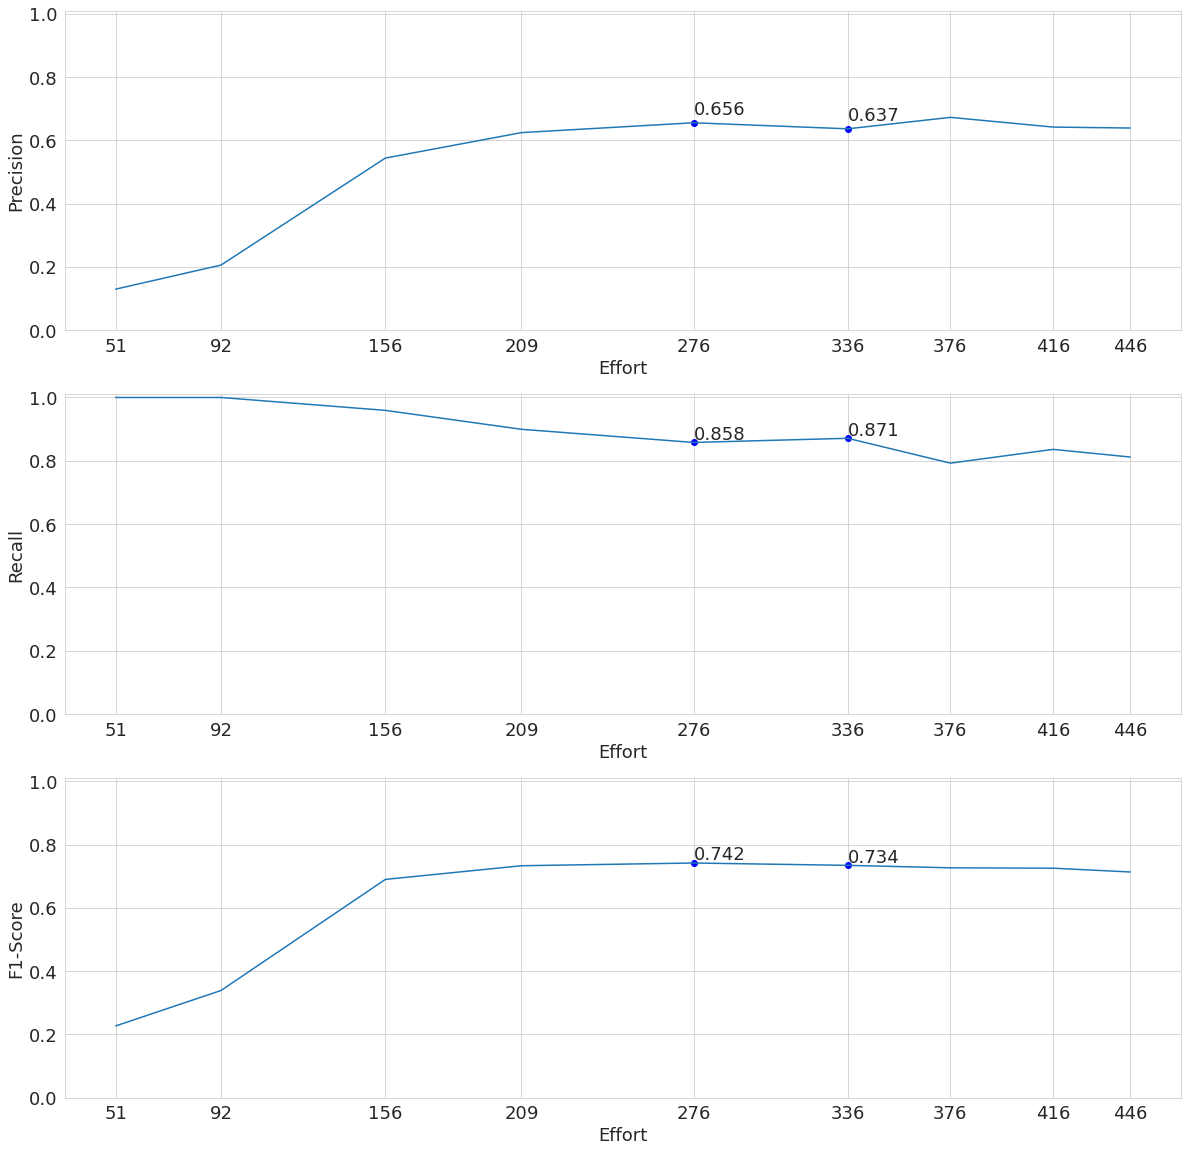

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=20,20
fig, ax = plt.subplots(3,1)
ax[0].set_ylim(-0.01,1.01)
ax[1].set_ylim(-0.01,1.01)
ax[2].set_ylim(-0.01,1.01)
print(f'experiment_name                                    - AUC prec  - AUC rec   - AUC f1')
for experiment_name in set(df['experiment_name']):
    
    
    ## DEBUG
    if 'relevance_BoW' in experiment_name :
    ## END DEBUG
        auxdf=aggregatedf[aggregatedf['experiment_name']==experiment_name]

        x = (auxdf['effort'])
        p = auxdf['precision']
        r = auxdf['recall']
        f1 = auxdf['f1-score']

    #     f1std=auxdf['f1-score_std']
    #     print(f1std)
    #     print(type(f1std))
        perfect = auc(x,[1]*len(x))
        print(f'{experiment_name:60} - {auc(x,p)/perfect:4.3f} - {auc(x,r)/perfect:4.3f} - {auc(x,f1)/perfect:4.3f}')
        ax[0].plot(x,p, label=experiment_name)
        ax[0].set_ylabel('Precision', fontsize=18)
        ax[1].plot(x,r, label=experiment_name)
        ax[1].set_ylabel('Recall', fontsize=18)
        ax[2].plot(x,f1, label=experiment_name)
        ax[2].set_ylabel('F1-Score', fontsize=18)
#         ax[1].legend(fontsize=18)

        for i in [4,5]:
            ax[0].text(x=x.iloc[i], y=p.iloc[i]+0.025, s=f'{p.iloc[i]:4.3f}', fontsize=18)
            ax[0].scatter([x.iloc[i]], [p.iloc[i]], color='blue')
            ax[1].text(x=x.iloc[i], y=r.iloc[i]+0.01, s=f'{r.iloc[i]:4.3f}', fontsize=18)
            ax[1].scatter([x.iloc[i]], [r.iloc[i]], color='blue')
            ax[2].text(x=x.iloc[i], y=f1.iloc[i]+0.01, s=f'{f1.iloc[i]:4.3f}', fontsize=18)
            ax[2].scatter([x.iloc[i]], [f1.iloc[i]], color='blue')
        
        for a in ax:
            a.tick_params(axis='both', which='major', labelsize=18)
            a.set_xlabel('Effort', fontsize=18)
            a.set_xticks(sorted(list(set(auxdf['effort']))))
            a.set_ylim(0, 1.01)
fig.savefig('relevance_bow.png')

# PRECISION AT RANGE FOR N=1000 (effort=276)

In [13]:
import os
import pandas as pd
import re
from utils.oracle import Oracle
from utils.data_item import DataItem
from sklearn.metrics import precision_score
import numpy as np

homepath='/home/ec2-user/SageMaker/mariano/notebooks/07. Simulation/'
sessionpath=homepath+'sessions/scal/simulations/'

files = [os.path.join(sessionpath,file) for file in os.listdir(sessionpath) if 'N_1000' in file and '_relevance_seed' in file and not 'sbert' in file and not 'glove' in file]
# assert os.path.isfile(filepath)

def url2id(url):
    return re.search('https://proquest.com/docview/([0-9]{10})',url).group(1)
files
data = {}
acc_data={}
for sessionpath in files:
#     print(sessionpath)
    seed = int(re.search('seed_([0-9]*)',sessionpath).group(1))
#     print(f'seed={seed}')
    filepath = [os.path.join(os.path.join(sessionpath,'data/'),file) for file in  os.listdir(os.path.join(sessionpath,'data/')) if 'exported' in file][0]
    lines = open(filepath,'r').read().splitlines()[1:]
#     print(filepath[-100:])
#     print(lines[:3])

    ids = list(map(url2id, lines))

    precision = []
    accumulated = []
    for end in range(1,len(ids)):
        yhat = [1]*len(ids[:end])
        ytrue = [1 if Oracle.is_relevant(DataItem(id_)) else 0 for id_ in ids[:end]]
    #     acc = accuracy_score(ytrue,yhat>=t)
        precision.append(precision_score(ytrue, yhat))
        accumulated.append(np.sum(ytrue))
    data[seed]=precision
    acc_data[seed]=accumulated
min_ = min([len(data[seed]) for seed in data])

for seed in data:
    data[seed] = data[seed][:min_]
df = pd.DataFrame(data)



min_ = min([len(data[seed]) for seed in acc_data])
for seed in acc_data:
    acc_data[seed]=acc_data[seed][:min_]
acc_df =pd.DataFrame(acc_data)

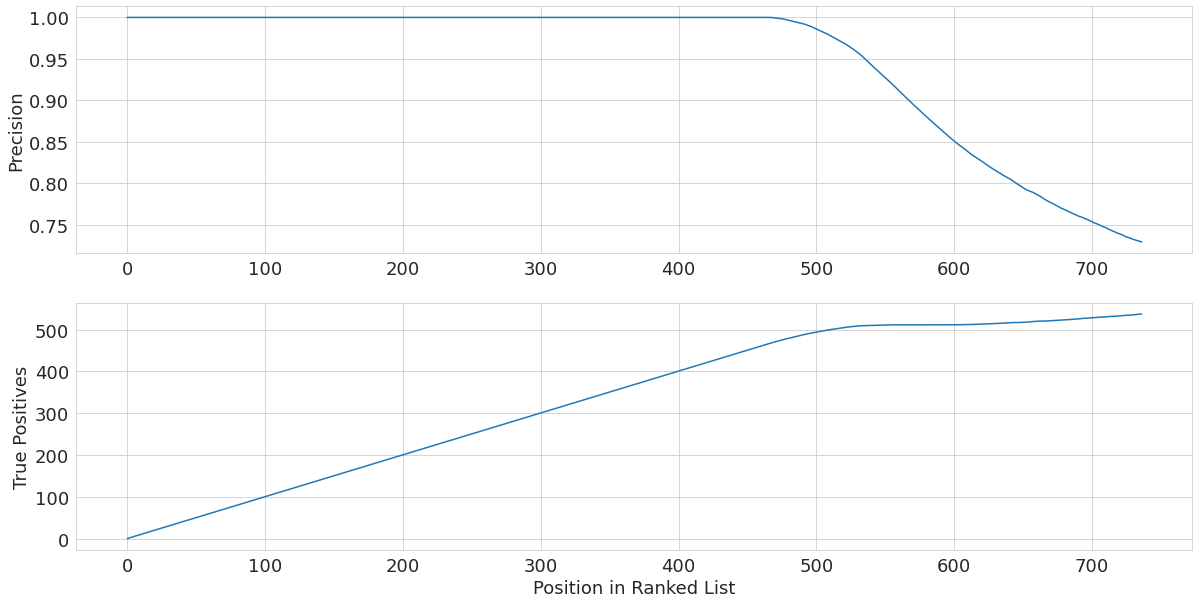

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
df = pd.DataFrame(data)
precision = np.mean(df.values, axis=1)

fig,ax = plt.subplots(2, figsize=(20,10))

ax[0].plot(range(len(precision)), precision)
ax[0].set_ylabel('Precision',fontsize=18)
ax[1].plot(range(len(np.mean(acc_df.values, axis=1))), np.mean(acc_df.values, axis=1))
ax[1].set_ylabel('True Positives',fontsize=18)
# ax[0].set_xlabel('Position in Ranked List',fontsize=18)
ax[1].set_xlabel('Position in Ranked List',fontsize=18)

for a in ax:
    a.tick_params(axis='both', which='major', labelsize=18)
    
fig.savefig('simulation_TP_and_precision_evaluation_at_276.png')

# OLD

In [8]:
import os
import re
import pandas as pd
import numpy as np 

averages=[]
data = {'f1-score':[],
        'accuracy':[],
        'precision':[],
        'recall':[],
        'prevalecence':[],
        'rel_found':[],
        'TP':[],
        'TN':[],
        'FP':[],
        'FN':[],
        'effort':[],
        'folder':[],
        'seed':[],
        'proportion':[],
       }
folders = [folder for folder in os.listdir('sessions/scal/') if folder.startswith('simulation_tr') and not 'diversity' in folder ]
for folder in folders:
    if os.path.isfile(f'sessions/scal/{folder}/log/scal_system.log'):
        content = open( f'sessions/scal/{folder}/log/scal_system.log', 'r').read()
        if 'SIMULATION RESULTS' in content:
            data['folder'].append(folder)
            data['accuracy'].append(float(re.findall('accuracy=([0-9\.]*)', content)[0]))

            data['precision'].append(float(re.findall('precision=([0-9\.]*) ', content)[0]))
            data['recall'].append(float(re.findall('- recall=([0-9\.]*) ', content)[0]))
            data['f1-score'].append(float(re.findall('F1-score=([0-9\.]*) ', content)[0]))
            data['effort'].append(int(re.findall('labeled size *=([0-9]*)', content)[0]))
            data['prevalecence'].append(float(re.findall('prevalecence *=([0-9\.]*)', content)[0]))
            data['rel_found'].append(int(re.findall('Relevant found \(total\) =([0-9]*)\(', content)[0]))

            data['TP'].append(int(re.findall('TP=([0-9]*) ', content)[0]))
            data['TN'].append(int(re.findall('TN=([0-9]*) ', content)[0]))
            data['FP'].append(int(re.findall('FP=([0-9]*) ', content)[0]))
            data['FN'].append(int(re.findall('FN=([0-9]*) ', content)[0]))

            # CORRECT THIS ONE
            seed = re.findall('_seed_([0-9]*)', folder)[0]
            data['seed'].append(int(seed))
            
            proportion = re.findall('proportion_([0-9]*)', folder)[0]
            data['proportion'].append(int(proportion))


        
df = pd.DataFrame(data)
LR = df['rel_found'] -( df['TP'] + df['FP'])

rec = (df['TP']+LR) / (df['TP'] + df['FN']+LR)

prec = (df['TP']+LR) / (df['TP'] + df['FP']+LR)

f1 = 2*((prec*rec)/(rec+prec))

df['recall (total)']=rec
df['precision (total)']=prec
df['f1-score (total)']=f1
df


,f1-score,accuracy,precision,recall,prevalecence,rel_found,TP,TN,FP,FN,effort,folder,seed,proportion,recall (total),precision (total),f1-score (total)


In [9]:
set(df['effort'])

{51, 92, 156, 209, 276, 336, 376, 416, 446}

In [14]:
sns_data = {'effort':[],
            'seed':[],
            'folder':[],
            'metric':[],
#             'proportion':[],
            'value':[]
}
for i in range(df.shape[0]):
    effort = df['effort'].iloc[i]
    seed = df['seed'].iloc[i]
    folder = df['folder'].iloc[i]
    proportion = df['proportion'].iloc[i]
    for column in df.columns:
        if column!='effort' and column!='seed' and column!='folder' and column!='proportion':
            value = df[column].iloc[i]
            sns_data['effort'].append(effort)
            sns_data['seed'].append(seed)
            sns_data['folder'].append(folder)
#             sns_data['proportion'].append(proportion)
            if not 'diversity' in folder:
                sns_data['metric'].append(column+' - '+str(proportion))
            else:
                sns_data['metric'].append(column+' - '+str(proportion)+' diversity')
                if 'avg' in folder:
                    sns_data['metric'][-1]=sns_data['metric'][-1]+' avg'
            sns_data['value'].append(value)
sns_df = pd.DataFrame(sns_data)
sns_df

,effort,seed,folder,metric,value
0,209,4824,simulation_tr_80_N_500_seed_4824_proportion_50,f1-score - 50,0.813000
1,209,4824,simulation_tr_80_N_500_seed_4824_proportion_50,accuracy - 50,0.964000
2,209,4824,simulation_tr_80_N_500_seed_4824_proportion_50,precision - 50,1.000000
3,209,4824,simulation_tr_80_N_500_seed_4824_proportion_50,recall - 50,0.910000
4,209,4824,simulation_tr_80_N_500_seed_4824_proportion_50,prevalecence - 50,0.092000
...,...,...,...,...,...
2920,92,3596,simulation_tr_80_N_100_seed_3596_proportion_25,FP - 25,1592.000000
2921,92,3596,simulation_tr_80_N_100_seed_3596_proportion_25,FN - 25,0.000000
2922,92,3596,simulation_tr_80_N_100_seed_3596_proportion_25,recall (total) - 25,1.000000
2923,92,3596,simulation_tr_80_N_100_seed_3596_proportion_25,precision (total) - 25,0.291500


# precision, recall, f1-score

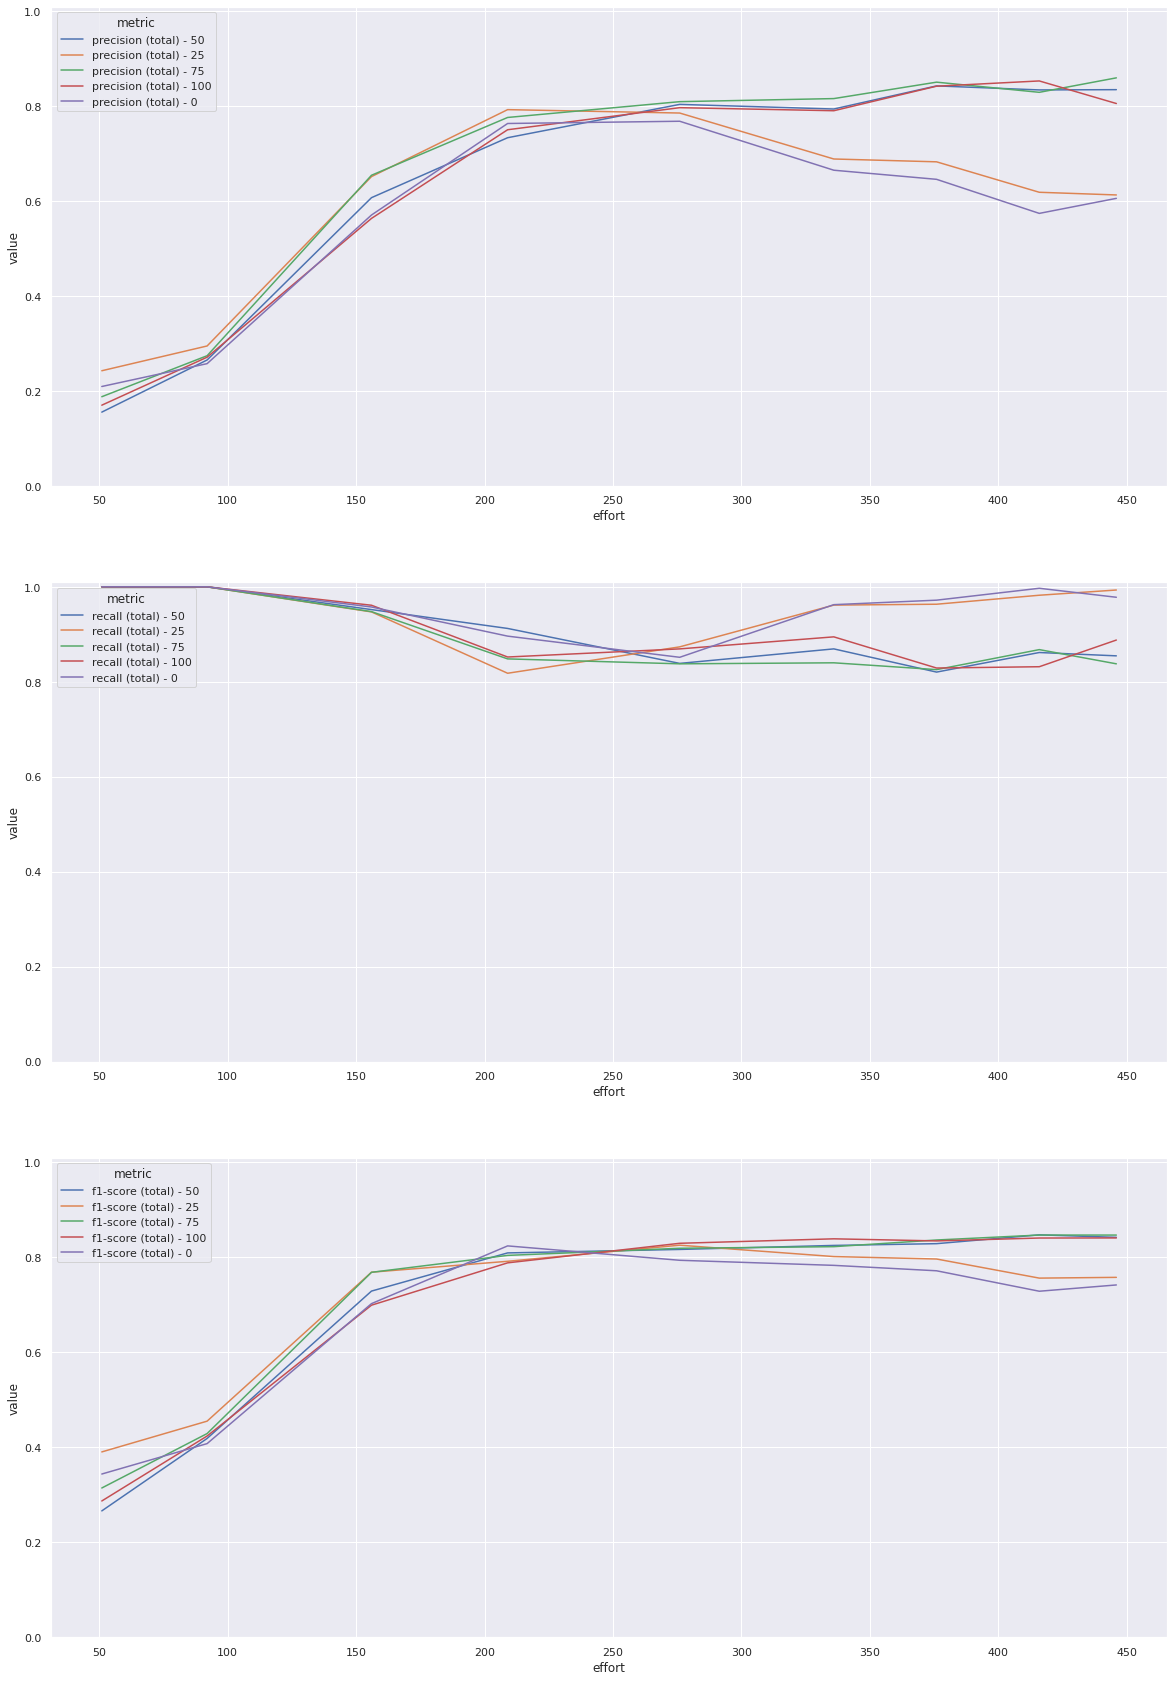

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=20,30
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
# Plot the responses for different events and regions

metrics = ['precision', 'recall', 'f1-score']
fig, axs = plt.subplots(len(metrics),1)

total = True
diversity = False
proportions=[0,25,50,75,100]
avg=False
for metric,ax in zip(metrics,axs):
    columns_to_plot = [metric]*len(proportions)
    if total:
        columns_to_plot = [elem+' (total)' for elem in columns_to_plot]
    columns_to_plot = [elem+f' - {proportion}' for elem,proportion in zip(columns_to_plot, proportions)]
    if diversity:
        columns_to_plot = [column+' diversity' for column in columns_to_plot]
        if avg:
            columns_to_plot =  [column+' avg' for column in columns_to_plot]
    masks = [sns_df['metric']==column for column in columns_to_plot]

    mask=masks[0]
    for m in masks[1:]:
        mask = mask|m

    someoutput= sns.lineplot(x="effort", y="value",
                 data=sns_df[mask],markers=True,
                 hue='metric',ax=ax, ci=None)
    ax.set_ylim(0,1.01)

In [79]:
(df[df['effort']==209])

,f1-score,accuracy,precision,recall,prevalecence,rel_found,TP,TN,FP,FN,effort,folder,seed,proportion,recall (total),precision (total),f1-score (total)
0,0.527,0.942,0.909,0.371,0.079,290,229,6432,23,388,209,simulation_tr_80_N_500_seed_24714_proportion_100,24714,100,0.407634,0.920690,0.565079
2,0.660,0.953,0.872,0.532,0.112,420,320,6423,47,282,209,simulation_tr_80_N_500_seed_7096_proportion_0_...,7096,0,0.569466,0.888095,0.693953
10,0.720,0.957,0.832,0.634,0.083,509,390,6378,79,225,209,simulation_tr_80_N_500_seed_6814_proportion_10...,6814,100,0.656489,0.844794,0.738832
11,0.734,0.960,0.864,0.638,0.077,493,394,6392,62,224,209,simulation_tr_80_N_500_seed_23493_proportion_2...,23493,25,0.658015,0.874239,0.750871
29,0.714,0.958,0.858,0.612,0.086,479,375,6397,62,238,209,simulation_tr_80_N_500_seed_5524_proportion_50,5524,50,0.636641,0.870564,0.735450
36,0.780,0.963,0.803,0.758,0.098,621,461,6351,113,147,209,simulation_tr_80_N_500_seed_17052_proportion_75,17052,75,0.775573,0.818035,0.796238
47,0.660,0.954,0.896,0.523,0.094,401,319,6425,37,291,209,simulation_tr_80_N_500_seed_21623_proportion_7...,21623,75,0.555725,0.907731,0.689394
53,0.708,0.956,0.819,0.624,0.091,509,381,6377,84,230,209,simulation_tr_80_N_500_seed_27787_proportion_25,27787,25,0.648855,0.834971,0.730241
65,0.589,0.947,0.879,0.443,0.104,355,268,6430,37,337,209,simulation_tr_80_N_500_seed_24526_proportion_5...,24526,50,0.485496,0.895775,0.629703
70,0.822,0.966,0.758,0.899,0.089,769,551,6283,176,62,209,simulation_tr_80_N_500_seed_20661_proportion_0,20661,0,0.905344,0.771131,0.832865


## BORRAR


# AUC

In [19]:
new_data = {'seeds':[], 'diversity':[]}
count=0
for column in df.columns:
    if column!='seed':
        new_data[column]=[]

# for diversity in [False, True]:
for diversity in [False, ]:
    for proportion in [0,25, 50, 75, 100]:
        for effort in set(df['effort']):
#             if diversity==False or (diversity==True and proportion==100): 

            aux =  df[(df['proportion']==proportion) & (df['effort']==effort)]
            div_mask =np.array([('diversity' in folder and 'avg' not in folder) for folder in aux['folder']])
            avg_mask =np.array(['avg' in folder for folder in aux['folder']])
            if diversity:
                aux=aux[div_mask]
            else:   
                aux=aux[~(div_mask)]

            folder = '_'.join(aux['folder'].iloc[0].split('_')[:-4]) + f'_proportion_{int(proportion)}'
            if diversity:
                folder+='_diversity'
            if avg:
                folder+='_avg'
            seeds=';'.join([str(seed) for seed in aux['seed']])
            new_data['seeds'].append(seeds)
            new_data['folder'].append(folder)
            new_data['diversity'].append(diversity)

            del(aux['folder'],aux['seed'],)
#             print(f'from {aux.shape} to {aux.mean().shape}')
            averages = aux.mean()
            for metric,value in zip(averages.index,averages):
                new_data[metric].append(value)
        
#             print(folder)
# proportion=0
# aux = df[(df['proportion']==proportion) & (df['effort']==51)]
# count
auc_df = pd.DataFrame(new_data)

auc_df.head()

,seeds,diversity,f1-score,accuracy,precision,recall,prevalecence,rel_found,TP,TN,FP,FN,effort,folder,proportion,recall (total),precision (total),f1-score (total)
0,4567;24927;19668;6690;31046,False,0.6724,0.9292,1.0,0.9960,0.0956,1137.6,498.8,5879.6,484.6,2.0,416.0,simulation_tr_80_N_4500_proportion_0,0.0,0.996947,0.574358,0.728723
1,1266;13;17244;25405;27354,False,0.4044,0.7254,0.6,1.0000,0.0842,2627.0,646.0,4571.0,1972.0,0.0,92.0,simulation_tr_80_N_100_proportion_0,0.0,1.000000,0.257948,0.407852
2,21673;22936;20314;15198;15777,False,0.7480,0.9486,1.0,0.9546,0.0954,961.6,517.6,6071.6,331.2,24.6,336.0,simulation_tr_80_N_2000_proportion_0,0.0,0.962443,0.665267,0.783204
3,21475;10718;21152;3395;13080,False,0.8122,0.9646,1.0,0.8888,0.0960,769.8,541.4,6279.8,182.8,68.0,209.0,simulation_tr_80_N_500_proportion_0,0.0,0.896183,0.763651,0.824185
4,11872;9866;15144;8301;32364,False,0.3414,0.6332,1.0,1.0000,0.1386,3306.6,647.4,3931.0,2651.6,0.0,51.0,simulation_tr_80_N_50_proportion_0,0.0,1.000000,0.209834,0.343813


In [22]:
from sklearn.metrics import auc
metrics = ['precision', 'recall', 'f1-score']
total = False
perfect_score=None

table = {'0':[],
         '25':[],
         '50':[],
         '75':[],
         '100':[],
#          '0-diversity':[],
#          '25-diversity':[],
#          '50-diversity':[],
#          '75-diversity':[],
#          '100-diversity':[]
        }

# for diversity in [True,False]:
for diversity in [False]:
    for proportion in [0,25,50,75,100]:
        for metric in metrics:
#             if diversity==False or (diversity==True and proportion==100):
            if total:
                metric+=' (total)'
            aux = auc_df[(auc_df['proportion']==proportion) & (auc_df['diversity']==diversity) ]


            aux = aux.sort_values(by='effort')
            x = list(aux['effort'])
            y = list(aux[metric])
#                 if perfect_score is None:
            perfect_score = auc(x, [1]*len(x))
#                 else:
#                     assert perfect_score==auc(x, [1]*len(x))
            value = auc(x,y)/perfect_score
            key = str(proportion)+('-diversity' if diversity else '')
            table[key].append(value)
#             print(f'{metric:20} - {proportion:3} : {value}')
table_df = pd.DataFrame(table, index=metrics, )
# table_df.columns=['0%','25%','50%','75%','100%',
#                   '0% (diversity)', '25% (diversity)', '50% (diversity)', '75% (diversity)', '100% (diversity)'
#                   ]
table_df

,0,25,50,75,100
precision,0.946835,0.963038,0.903038,0.911646,1.000000
recall,0.938755,0.926444,0.882011,0.866813,0.882194
f1-score,0.674801,0.702726,0.703667,0.713733,0.701987


In [21]:
table

{'0': [0.9468354430379747, 0.9387551898734178, 0.6748005063291139],
 '25': [0.9630379746835442, 0.9264437974683544, 0.7027258227848102],
 '50': [0.9030379746835444, 0.8820106329113923, 0.7036673417721518],
 '75': [0.9116455696202532, 0.8668126582278481, 0.713732911392405],
 '100': [1.0, 0.8821939240506328, 0.701986835443038],
 '0-diversity': [],
 '25-diversity': [],
 '50-diversity': [],
 '75-diversity': [],
 '100-diversity': []}

# Relevant found curve

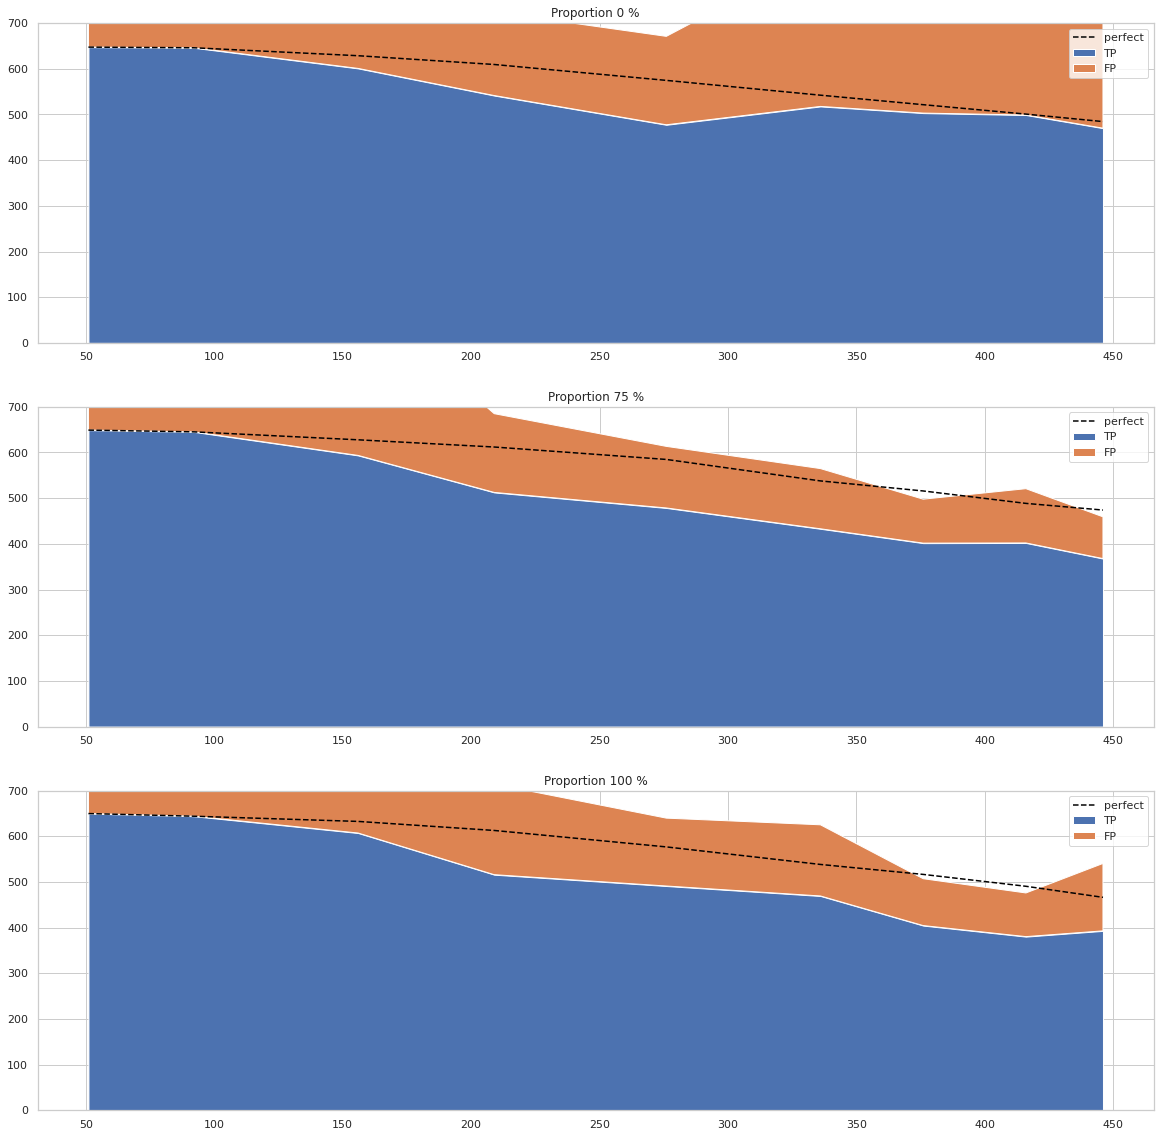

In [24]:
import seaborn as sns
plt.rcParams['figure.figsize']=20,20
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(3,1)
for idx, proportion in enumerate([0,75,100]):
    plt.rcParams['figure.figsize']=20,10
    rel_curve_df = auc_df[auc_df['proportion']==proportion]
    rel_curve_df = rel_curve_df.sort_values(by='effort')
    rel_curve_df.head()

    ax[idx].title.set_text(f'Proportion {proportion} %')
    ax[idx].fill_between(rel_curve_df['effort'], rel_curve_df['TP'], [0]*rel_curve_df.shape[0], label='TP')
    ax[idx].fill_between(rel_curve_df['effort'], rel_curve_df['FP']+ rel_curve_df['TP'],rel_curve_df['TP'], label='FP')
    ax[idx].plot(rel_curve_df['effort'], rel_curve_df['TP']+rel_curve_df['FN'], label='perfect',ls='dashed', c='black')

    ax[idx].legend()
    ax[idx].set_ylim(0,700)

In [ ]:
from sklearn.metrics import auc


metrics = ['precision', 'recall', 'f1-score']

total = True
perfect_score=None
proportions=[0,25,50,75,100]
for metric,ax in zip(metrics,axs):
    columns_to_plot = [metric]*len(proportions)
    if total:
        columns_to_plot = [elem+' (total)' for elem in columns_to_plot]
    columns_to_plot = [elem+f' - {proportion}' for elem,proportion in zip(columns_to_plot, proportions)]
    
    
    
    for column in columns_to_plot:
        aux = sns_df[sns_df['metric']==column]
        aux = aux.sort_values(by='effort')
        x = aux['effort']
        y = aux['value']
        if perfect_score is None:
            perfect_score = auc(x,[1]*len(x))
        else:
            assert perfect_score == auc(x,[1]*len(x))
            
        print(f'{column:25}={auc(x,y)/perfect_score:9.3f}')
    aux

5
5
1,9
2,9
3,459
4,281
5,9


<AxesSubplot:xlabel='effort', ylabel='value'>

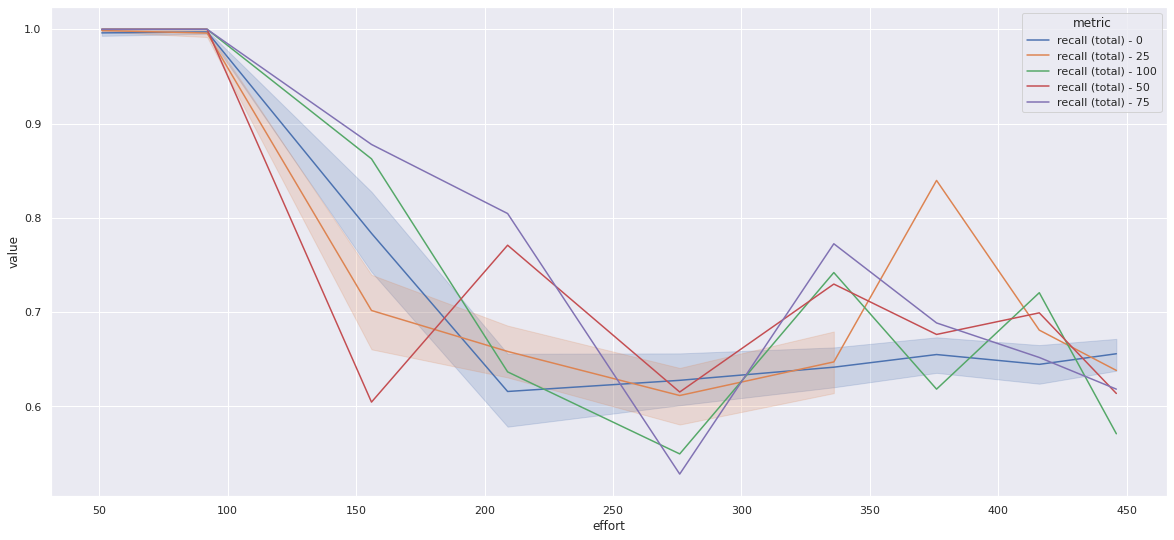

In [50]:
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize']=20,9
# import seaborn as sns
# sns.set_theme(style="darkgrid")

# # Load an example dataset with long-form data
# # Plot the responses for different events and regions

# columns_to_plot = [
#                    'recall (total) - 100',
#                    'recall (total) - 50',
#                    'recall (total) - 0', 
#                    'recall (total) - 25', 
#                    'recall (total) - 75',
# ]
# masks = [sns_df['metric']==column for column in columns_to_plot]
# print(len(columns_to_plot))
# print(len(masks))
# for idx,mask in enumerate(masks):
#     print(f'{idx+1},{len([elem for elem in mask if elem==True])}')
# mask=masks[0]
# for m in masks[1:]:
#     mask = mask|m

# sns.lineplot(x="effort", y="value",
#              data=sns_df[mask],markers=True,
#              hue='metric')


5
5
1,9
2,9
3,459
4,281
5,9


<AxesSubplot:xlabel='effort', ylabel='value'>

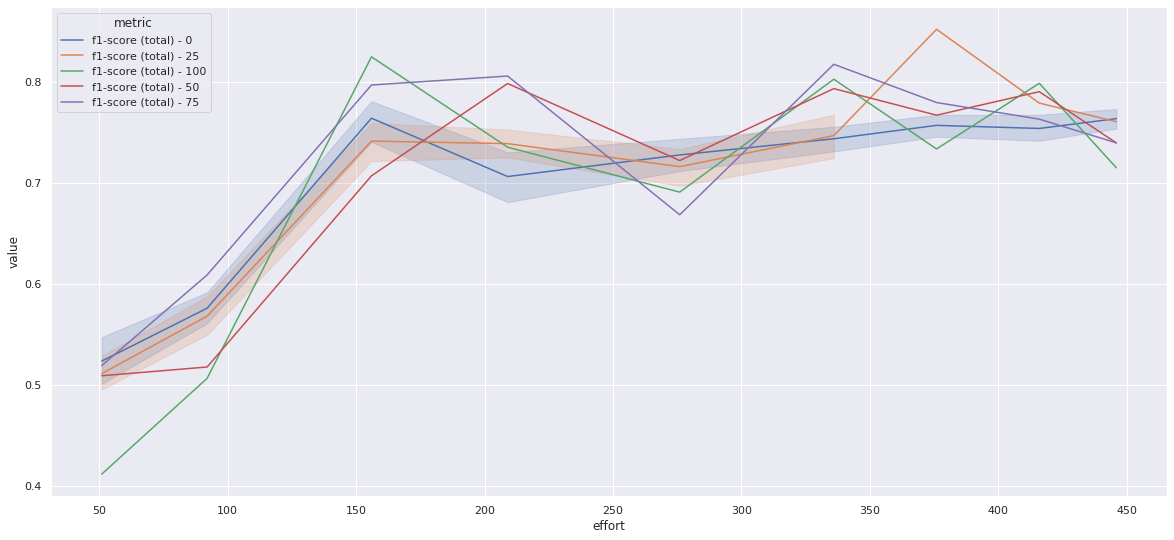

In [51]:
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize']=20,9
# import seaborn as sns
# sns.set_theme(style="darkgrid")

# # Load an example dataset with long-form data
# # Plot the responses for different events and regions

# columns_to_plot = [
#                    'f1-score (total) - 100',
#                    'f1-score (total) - 50',
#                    'f1-score (total) - 0', 
#                    'f1-score (total) - 25', 
#                    'f1-score (total) - 75',
# ]
# masks = [sns_df['metric']==column for column in columns_to_plot]
# print(len(columns_to_plot))
# print(len(masks))
# for idx,mask in enumerate(masks):
#     print(f'{idx+1},{len([elem for elem in mask if elem==True])}')
# mask=masks[0]
# for m in masks[1:]:
#     mask = mask|m

# sns.lineplot(x="effort", y="value",
#              data=sns_df[mask],markers=True,
#              hue='metric')


5
5
1,9
2,9
3,459
4,281
5,9


<AxesSubplot:xlabel='effort', ylabel='value'>

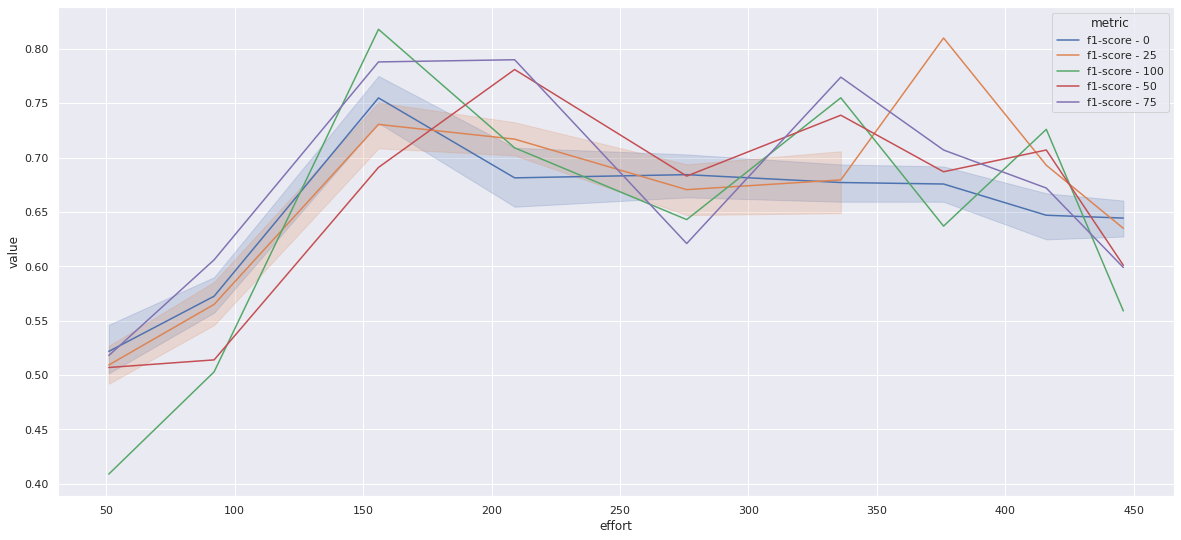

In [52]:
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize']=20,9
# import seaborn as sns
# sns.set_theme(style="darkgrid")

# # Load an example dataset with long-form data
# # Plot the responses for different events and regions

# columns_to_plot = [
#                    'f1-score - 100',
#                    'f1-score - 50',
#                    'f1-score - 0', 
#                    'f1-score - 25', 
#                    'f1-score - 75',
# ]
# masks = [sns_df['metric']==column for column in columns_to_plot]
# print(len(columns_to_plot))
# print(len(masks))
# for idx,mask in enumerate(masks):
#     print(f'{idx+1},{len([elem for elem in mask if elem==True])}')
# mask=masks[0]
# for m in masks[1:]:
#     mask = mask|m

# sns.lineplot(x="effort", y="value",
#              data=sns_df[mask],markers=True,
#              hue='metric')


In [16]:
df.head()


,f1-score,accuracy,precision,recall,prevalecence,rel_found,TP,TN,FP,FN,effort,folder,seed,proportion,recall (total),precision (total),f1-score (total)
0,0.730,0.962,0.834,0.650,0.082,534,356,6326,71,192,336,simulation_tr_80_N_2000_seed_11759_proportion_0,11759,0,0.706870,0.867041,0.778806
1,0.688,0.961,0.843,0.580,0.099,496,296,6340,55,214,376,simulation_tr_80_N_3000_seed_30201_proportion_25,30201,25,0.673282,0.889113,0.766290
2,0.679,0.963,0.834,0.572,0.093,508,267,6315,53,200,446,simulation_tr_80_N_6000_seed_27670_proportion_25,27670,25,0.694656,0.895669,0.782459
3,0.491,0.814,0.326,1.000,0.084,1993,646,5205,1338,0,92,simulation_tr_80_N_100_seed_26511_proportion_25,26511,25,1.000000,0.328650,0.494713
4,0.778,0.965,0.868,0.705,0.113,537,442,6431,67,185,156,simulation_tr_80_N_250_seed_6082_proportion_50,6082,50,0.717557,0.875233,0.788591


In [28]:
len(set(df['effort']))

9

,seeds,f1-score,accuracy,precision,recall,prevalecence,rel_found,TP,TN,FP,FN,effort,folder,proportion,recall (total),precision (total),f1-score (total)
4,20609;19704;17343;28124;6196;9751;3183;20680;2...,0.521804,0.827529,0.358588,0.996098,0.093471,1897.313725,647.058824,5335.647059,1244.803922,2.490196,51.0,simulation_tr_80_N_50_proportion_0,0.0,0.996198,0.360452,0.523854


In [35]:
aux = df[(df['proportion']==proportion) & (df['effort']==51)]
del(aux['folder'])
a = aux.mean()
a['f1-score']

0.5218039215686274

In [41]:
a.index

Index(['f1-score', 'accuracy', 'precision', 'recall', 'prevalecence',
       'rel_found', 'TP', 'TN', 'FP', 'FN', 'effort', 'seed', 'proportion',
       'recall (total)', 'precision (total)', 'f1-score (total)'],
      dtype='object')

In [20]:
aux = df[(df['proportion']==proportion) & (df['effort']==51)]
del(aux['folder'])
aux.mean()

# f1-score                 0.521804
# accuracy                 0.827529
# precision                0.358588
# recall                   0.996098
# prevalecence             0.093471
# rel_found             1897.313725
# TP                     647.058824
# TN                    5335.647059
# FP                    1244.803922
# FN                       2.490196
# effort                  51.000000
# seed                 17496.352941
# proportion               0.000000
# recall (total)           0.996198
# precision (total)        0.360452
# f1-score (total)         0.523854
# dtype: float64

f1-score                 0.521804
accuracy                 0.827529
precision                0.358588
recall                   0.996098
prevalecence             0.093471
rel_found             1897.313725
TP                     647.058824
TN                    5335.647059
FP                    1244.803922
FN                       2.490196
effort                  51.000000
seed                 17496.352941
proportion               0.000000
recall (total)           0.996198
precision (total)        0.360452
f1-score (total)         0.523854
dtype: float64

In [4]:
from sklearn.metrics import auc


metrics = ['precision', 'recall', 'f1-score']

total = True
perfect_score=None
proportions=[0,25,50,75,100]
for metric,ax in zip(metrics,axs):
    columns_to_plot = [metric]*len(proportions)
    if total:
        columns_to_plot = [elem+' (total)' for elem in columns_to_plot]
    columns_to_plot = [elem+f' - {proportion}' for elem,proportion in zip(columns_to_plot, proportions)]
    
    
    
    for column in columns_to_plot:
        aux = sns_df[sns_df['metric']==column]
        aux = aux.sort_values(by='effort')
        x = aux['effort']
        y = aux['value']
        if perfect_score is None:
            perfect_score = auc(x,[1]*len(x))
        else:
            assert perfect_score == auc(x,[1]*len(x))
            
        print(f'{column:25}={auc(x,y)/perfect_score:9.3f}')
    aux

precision (total) - 0    =    0.789
precision (total) - 25   =    0.765
precision (total) - 50   =    0.794
precision (total) - 75   =    0.771
precision (total) - 100  =    0.775
recall (total) - 0       =    0.710
recall (total) - 25      =    0.789
recall (total) - 50      =    0.746
recall (total) - 75      =    0.771
recall (total) - 100     =    0.740
f1-score (total) - 0     =    0.698
f1-score (total) - 25    =    0.740
f1-score (total) - 50    =    0.735
f1-score (total) - 75    =    0.734
f1-score (total) - 100   =    0.708


In [23]:
auc([1,1,1,1,2,3],[1,1,1,1,1,1])

2.0

In [57]:
aux.sort_values?

In [7]:
confidence_interval_from_matrix(np.vstack([averages]))

(array([6.42201059e-01, 9.18784367e-01, 6.11165502e-01, 6.10429978e-01,
        9.17764448e-02, 5.17808579e+02, 3.26000994e+02, 6.01723251e+03,
        6.87579819e+01, 1.03080641e+02, 1.71394001e+02]),
 array([6.99687830e-01, 9.60437855e-01, 7.97812276e-01, 8.16192244e-01,
        9.77124441e-02, 1.02683587e+03, 5.03999006e+02, 6.34021193e+03,
        4.75842018e+02, 2.06874915e+02, 3.52605999e+02]))

In [2]:
from utils.auxiliary import  confidence_interval 
import numpy as np


confidence_interval(np.random.normal(size=100))

(-0.12708866596190693, 0.23253575107524438)

In [62]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data)

pd.DataFrame(np.average(df.drop(labels=['folder'],axis=1).values, axis=0), columns=df.columns[:-1])



ValueError: Shape of passed values is (11, 1), indices imply (11, 11)

In [ ]:
# 0,51,0.848,0.371,0.6,0.540,1747,0.168
# 1,51,0.848,0.371,0.7,0.540,1747,0.168
# 2,51,0.845,0.365,0.8,0.535,1771,0.168
# 3,51,0.845,0.365,0.9,0.535,1771,0.168
# 4,156,0.943,0.615,0.6,0.746,996,0.109
# 5,156,0.941,0.602,0.7,0.741,1034,0.109
# 6,156,0.944,0.619,0.8,0.748,985,0.109
# 7,156,0.919,0.52,0.9,0.682,1225,0.109
# 8,209,0.958,0.748,0.6,0.762,678,0.093
# 9,209,0.955,0.689,0.7,0.772,824,0.093
# 10,209,0.957,0.756,0.8,0.753,650,0.093
# 11,209,0.934,0.569,0.9,0.718,1088,0.093
# 12,276,0.956,0.811,0.6,0.699,514,0.093
# 13,276,0.96,0.779,0.7,0.750,613,0.093
# 14,276,0.96,0.763,0.8,0.758,648,0.093
# 15,276,0.946,0.615,0.9,0.741,956,0.093
# 16,336,0.958,0.794,0.6,0.690,530,0.102
# 17,336,0.958,0.791,0.7,0.696,539,0.102
# 18,336,0.958,0.795,0.8,0.696,536,0.102
# 19,336,0.959,0.696,0.9,0.758,759,0.102
# 20,376,0.955,0.852,0.6,0.611,427,0.089
# 21,376,0.951,0.856,0.7,0.568,394,0.089
# 22,376,0.95,0.883,0.8,0.530,359,0.089
# 23,376,0.956,0.825,0.9,0.645,469,0.089
# 24,406,0.958,0.831,0.6,0.641,473,0.103
# 25,406,0.962,0.769,0.7,0.719,595,0.103
# 26,406,0.961,0.781,0.8,0.691,554,0.103
# 27,406,0.963,0.712,0.9,0.760,725,0.103
# 28,426,0.956,0.797,0.6,0.596,465,0.104
# 29,426,0.959,0.72,0.7,0.687,613,0.104
# 30,426,0.957,0.733,0.8,0.653,562,0.104
# 31,426,0.96,0.712,0.9,0.707,649,0.104
# 32,446,0.951,0.87,0.6,0.479,366,0.093
# 33,446,0.959,0.777,0.7,0.653,526,0.093
# 34,446,0.957,0.785,0.8,0.624,496,0.093
# 35,446,0.962,0.741,0.9,0.706,613,0.093